# LLC_Results

In [28]:
# imports

import os
import numpy as np

import pandas

import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting


In [2]:
os.getenv('ENDPOINT_URL')

'https://s3.nautilus.optiputer.net'

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Load table

In [30]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)

In [31]:
llc_table.head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,Tmin,Tmax,T90,T10
0,71.725098,-177.172684,12895,10607,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,LLC_uniform_preproc_test.h5,llc_std,64,-1.467546,-1.579000,-0.619,-1.351001,-1.541000
1,71.747978,-175.380554,12895,10676,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,LLC_uniform_preproc_test.h5,llc_std,64,-0.492408,-1.544001,3.539,3.364000,-1.540001
2,71.758400,-173.559555,12895,10746,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,LLC_uniform_preproc_test.h5,llc_std,64,3.271719,1.870000,3.774,3.499000,2.540999
3,71.755905,-171.737854,12895,10816,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,LLC_uniform_preproc_test.h5,llc_std,64,2.945127,1.368000,3.452,3.375000,2.229000
4,71.740822,-169.943695,12895,10885,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,LLC_uniform_preproc_test.h5,llc_std,64,2.364319,1.440000,3.272,2.841000,1.891000


# Load LL

In [4]:
LL_file = 's3://llc/Evaluations/LLC_uniform_test_std_log_prob.h5'

In [5]:
with ulmo_io.open(LL_file, 'rb') as f:
    LL_hf = h5py.File(f, 'r')

In [8]:
LL_hf.keys()

<KeysViewHDF5 ['valid']>

In [9]:
LL = LL_hf['valid'][:]

In [18]:
LL_hf.close()

# Plot

(0.0, 10000.0)

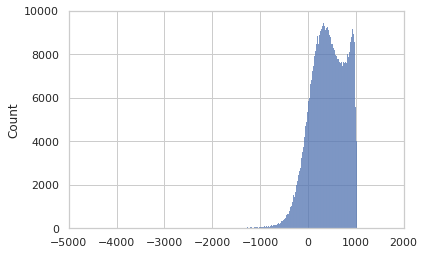

In [11]:
ax = sns.histplot(LL)
ax.set_xlim(-5000., 2000.)
ax.set_ylim(0., 10000.)

(0.0, 200.0)

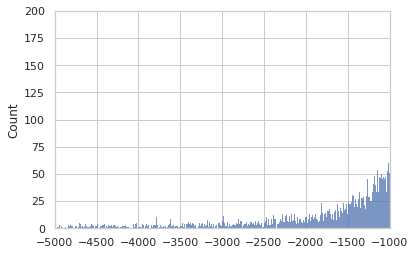

In [13]:
ax = sns.histplot(LL)
ax.set_xlim(-5000., -1000.)
ax.set_ylim(0., 200.)

# Show one

## Aim for -4000

In [16]:
i4000 = np.argmin(np.abs(LL+4000))
i4000

219001

In [17]:
llc_table.iloc[i4000]

lat                    -29.9971
lon                     74.8854
row                        6249
col                        5386
datetime    2011-11-30 00:00:00
Name: 219001, dtype: object

## PreProc

In [19]:
pp_file = 's3://llc/PreProc/LLC_uniform_preproc_test.h5'

In [20]:
with ulmo_io.open(pp_file, 'rb') as f:
    pp_hf = h5py.File(f, 'r')

In [22]:
pp_hf['valid'].shape

(781662, 1, 64, 64)

In [23]:
img = pp_hf['valid'][i4000, 0, ...]

## Show

<AxesSubplot:>

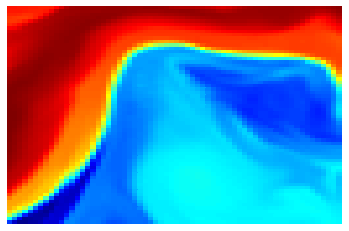

In [29]:
pal, cm = plotting.load_palette()
sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=False)